In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/simulated_matches.csv")
df.head()


,home_attack,home_defense,away_attack,away_defense,home_advantage,home_goals,away_goals,match_outcome
0,1.897179,1.901975,0.763832,0.915417,1.458412,3,3,1
1,1.755714,1.903662,1.811596,1.912414,1.263078,8,2,2
2,0.791188,0.826976,0.789521,0.935254,1.309326,2,1,2
3,0.896422,1.260509,1.535455,0.879991,1.438716,1,1,1
4,0.963022,1.747740,1.923966,1.302920,1.406304,3,4,0


In [ ]:
X = df[[
    "home_attack",
    "home_defense",
    "away_attack",
    "away_defense",
    "home_advantage"
]]

y = df["match_outcome"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True)
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)

    results.append([
        name,
        accuracy_score(y_test, preds),
        precision_score(y_test, preds, average="macro"),
        recall_score(y_test, preds, average="macro"),
        f1_score(y_test, preds, average="macro"),
        log_loss(y_test, probs)
    ])


In [ ]:
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Accuracy",
        "Precision",
        "Recall",
        "F1-score",
        "Log Loss"
    ]
)

results_df


,Model,Accuracy,Precision,Recall,F1-score,Log Loss
0,Logistic Regression,0.586667,0.498570,0.491738,0.447989,0.921939
1,KNN,0.496667,0.445334,0.455172,0.446760,5.703128
2,Naive Bayes,0.590000,0.556033,0.496905,0.469699,0.927380
3,Decision Tree,0.430000,0.396670,0.395225,0.394792,20.544882
4,Random Forest,0.543333,0.472002,0.471805,0.456365,0.989980
5,Gradient Boosting,0.546667,0.454981,0.465635,0.445643,0.989236
6,SVM,0.573333,0.525433,0.481216,0.461559,0.959034


In [ ]:
results_df.to_csv("model_evaluation.csv", index=False)


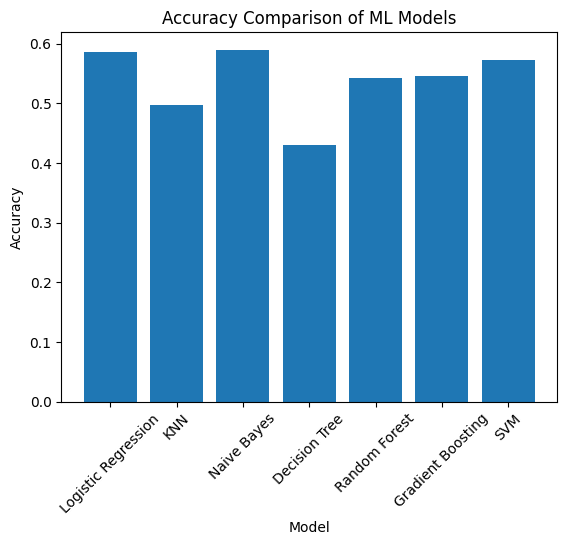

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models")
plt.show()


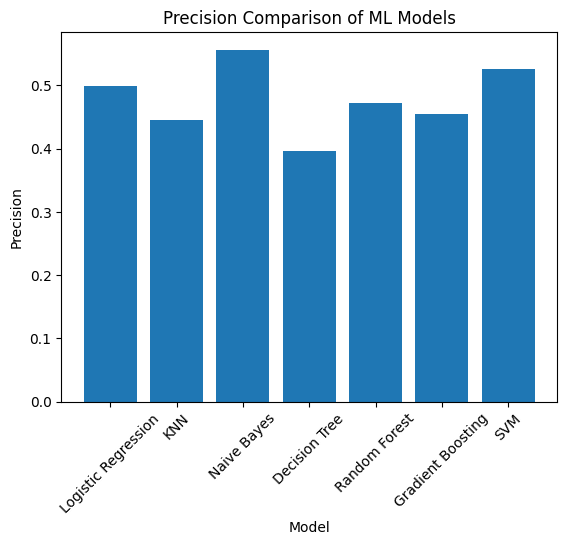

In [15]:
plt.figure()
plt.bar(results_df["Model"], results_df["Precision"])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Precision")
plt.title("Precision Comparison of ML Models")
plt.show()


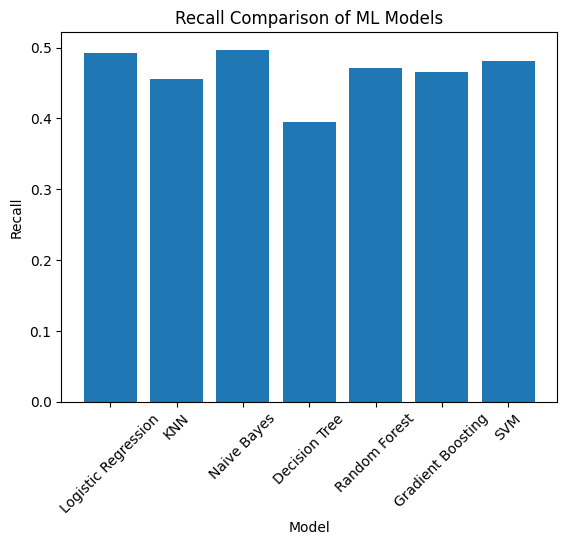

In [16]:
plt.figure()
plt.bar(results_df["Model"], results_df["Recall"])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Recall Comparison of ML Models")
plt.show()


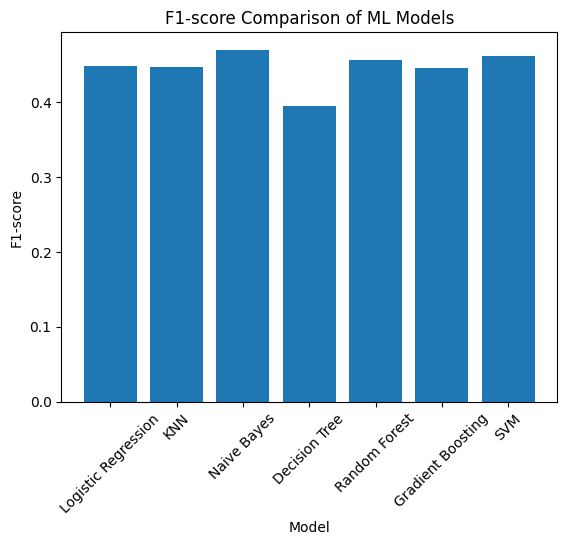

In [17]:
plt.figure()
plt.bar(results_df["Model"], results_df["F1-score"])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.title("F1-score Comparison of ML Models")
plt.show()


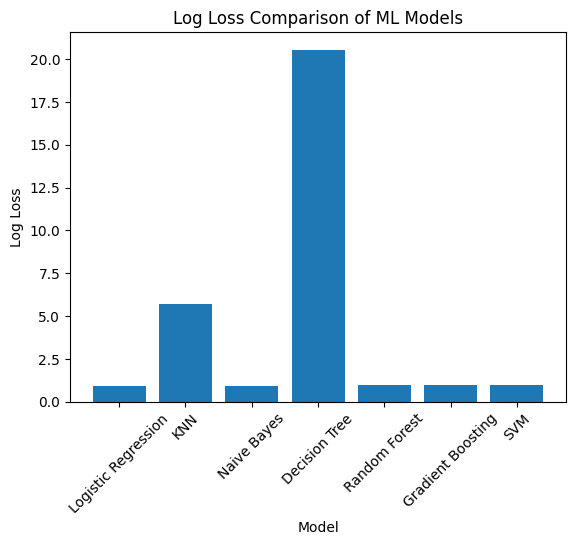

In [18]:
plt.figure()
plt.bar(results_df["Model"], results_df["Log Loss"])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Log Loss")
plt.title("Log Loss Comparison of ML Models")
plt.show()
